# Data Description

There are 8 variables: 

- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from O to 60 mph (sec.)
- yr: model year (modulo 100)
- origin: origin of car (1 - American, 2 - European, 3 - Japanese)
- car name: car model name 

Missing data values are marked by series of question marks.

**Importing necessary libraries**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Removes the limit from the number of displayed columns
pd.set_option("display.max_columns", None)
# Changes the limit of number of displayed rows to 200
pd.set_option("display.max_rows", 200)

In [2]:
from google.colab import files
import io

try:
    uploaded
except NameError:
    uploaded = files.upload()

data = pd.read_csv(io.BytesIO(uploaded['auto-mpg.csv']))
# for Jupyter Notebook IDE, the previous code lines can be commented out
# and only the next line can be uncommented and run
#data = pd.read_csv("auto-mpg.csv")
data.shape

(398, 9)

In [3]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


We will drop the non-numerical variables. Remember, 'origin' is categorical.

In [4]:
# dropping car_name  and origin
cData = data.copy()
cData = cData.drop(['car name','origin'], axis=1)
cData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


In [5]:
cData.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year']

In [6]:
cData.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year'],
      dtype='object')

### Dealing with Missing Values

In [7]:
# isdigit()? on 'horsepower' 
hpIsDigit = pd.DataFrame(cData.horsepower.str.isdigit())  # if the string is made of digits store True else False

# print isDigit = False!
cData[hpIsDigit['horsepower'] == False]   # from temp take only those rows where hp has false

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


There are various ways to handle missing values. Drop the rows, replace missing values with median values etc. of the 398 rows 6 have NaN in the hp column. We could drop those 6 rows - which might not be a good idea under all situations. Here, we will replace them with their median values. First replace '?' with NaN, and then replace NaN with median.

In [8]:
cData = cData.replace('?', np.nan)
cData[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,NaN,2046,19.0,71
126,21.0,6,200.0,NaN,2875,17.0,74
330,40.9,4,85.0,NaN,1835,17.3,80
336,23.6,4,140.0,NaN,2905,14.3,80
354,34.5,4,100.0,NaN,2320,15.8,81
374,23.0,4,151.0,NaN,3035,20.5,82


In [9]:
# checking median values of columns
cData.median()

mpg               23.0
cylinders          4.0
displacement     148.5
horsepower        93.5
weight          2803.5
acceleration      15.5
model year        76.0
dtype: float64

In [10]:
# replace the missing values with median value.
# Note, we do not need to specify the column names below
# every column's missing value is replaced with that column's median respectively (axis=0 means columnwise)
#cData = cData.fillna(cData.median())

medianFiller = lambda x: x.fillna(x.median())
cData = cData.apply(medianFiller,axis=0)

cData['horsepower'] = cData['horsepower'].astype('float64')  # converting the hp column from object / string type to float

## Bivariate Plots

A bivariate analysis among the different independent variables can be done using scatter matrix plot. Seaborn libs create a dashboard reflecting useful information about the dimensions. The result can be stored as a .png file.

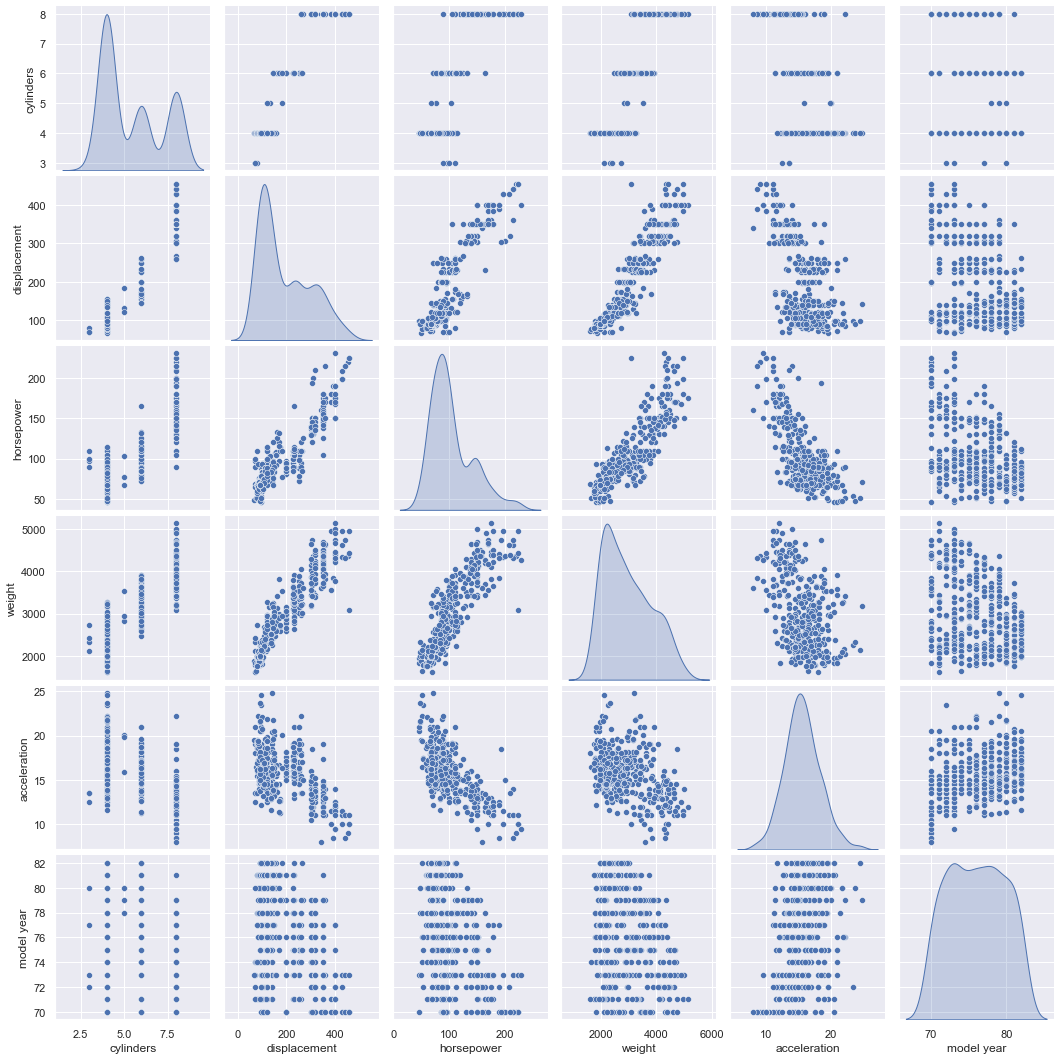

In [11]:
# independent variables
df= cData.drop(['mpg'], axis=1)
# the dependent variable
y = cData[['mpg']]

sns.pairplot(df, diag_kind='kde')   # to plot density curve instead of histogram on the diag

In [12]:
# scaling the data
from scipy.stats import zscore
X = df.apply(zscore)
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model year
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


### Applying t-SNE technique

In the next few lines of code will be projecting the 6-dimensional data to two-dimensions using t-SNE.

**Note**: We only use the features for dimensionality reduction, we don't need the dependent variable.

In [13]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=8)
X_reduced = tsne.fit_transform(X)

In [14]:
X_reduced.shape

(398, 2)

In [15]:
reduced_data_df = pd.DataFrame(data = X_reduced, columns = ['Component 1', 'Component 2'])

In [16]:
reduced_data_df.tail()

,Component 1,Component 2
393,11.683191,-5.751290
394,4.046392,-11.270292
395,17.757336,-0.072984
396,6.661248,-6.110504
397,5.888115,-6.582754


<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

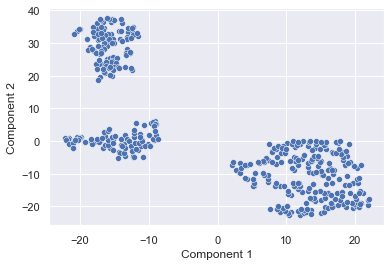

In [17]:
sns.scatterplot(x=reduced_data_df.iloc[:,0],y=reduced_data_df.iloc[:,1])

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

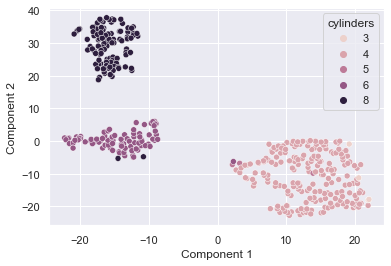

In [18]:
# Lets see scatter plot of the data w.r.t number of cyinders
sns.scatterplot(x=reduced_data_df.iloc[:,0],y=reduced_data_df.iloc[:,1],hue=cData.cylinders)

**Observations**

- 3 different groups of observations are visible.
- Cars with larger numbers of cylinders (8) seem to be in one group, cars with small number of cylinders (3,4) seem to be in different group, and cars with medium number (4,5,6) of cylinders seem to form another group.
- There are a few points though which do not follow the aforementioned grouping strategy.

In [19]:
# Lets assign points to the 3 different groups
def grouping(x):
    first_component = x['Component 1']
    second_component = x['Component 2']
    if second_component> 10: 
        return 'group_1'
    if (second_component < 10) and (first_component < 0):
        return 'group_2'
    if first_component> 0: 
        return 'group_3'

In [20]:
reduced_data_df['different_groups'] = reduced_data_df.apply(grouping,axis=1)

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

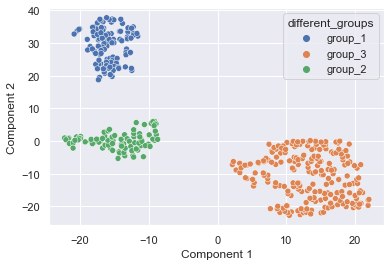

In [21]:
sns.scatterplot(x=reduced_data_df.iloc[:,0],y=reduced_data_df.iloc[:,1],hue=reduced_data_df.iloc[:,2])

In [22]:
df['different_groups'] = reduced_data_df['different_groups'] 

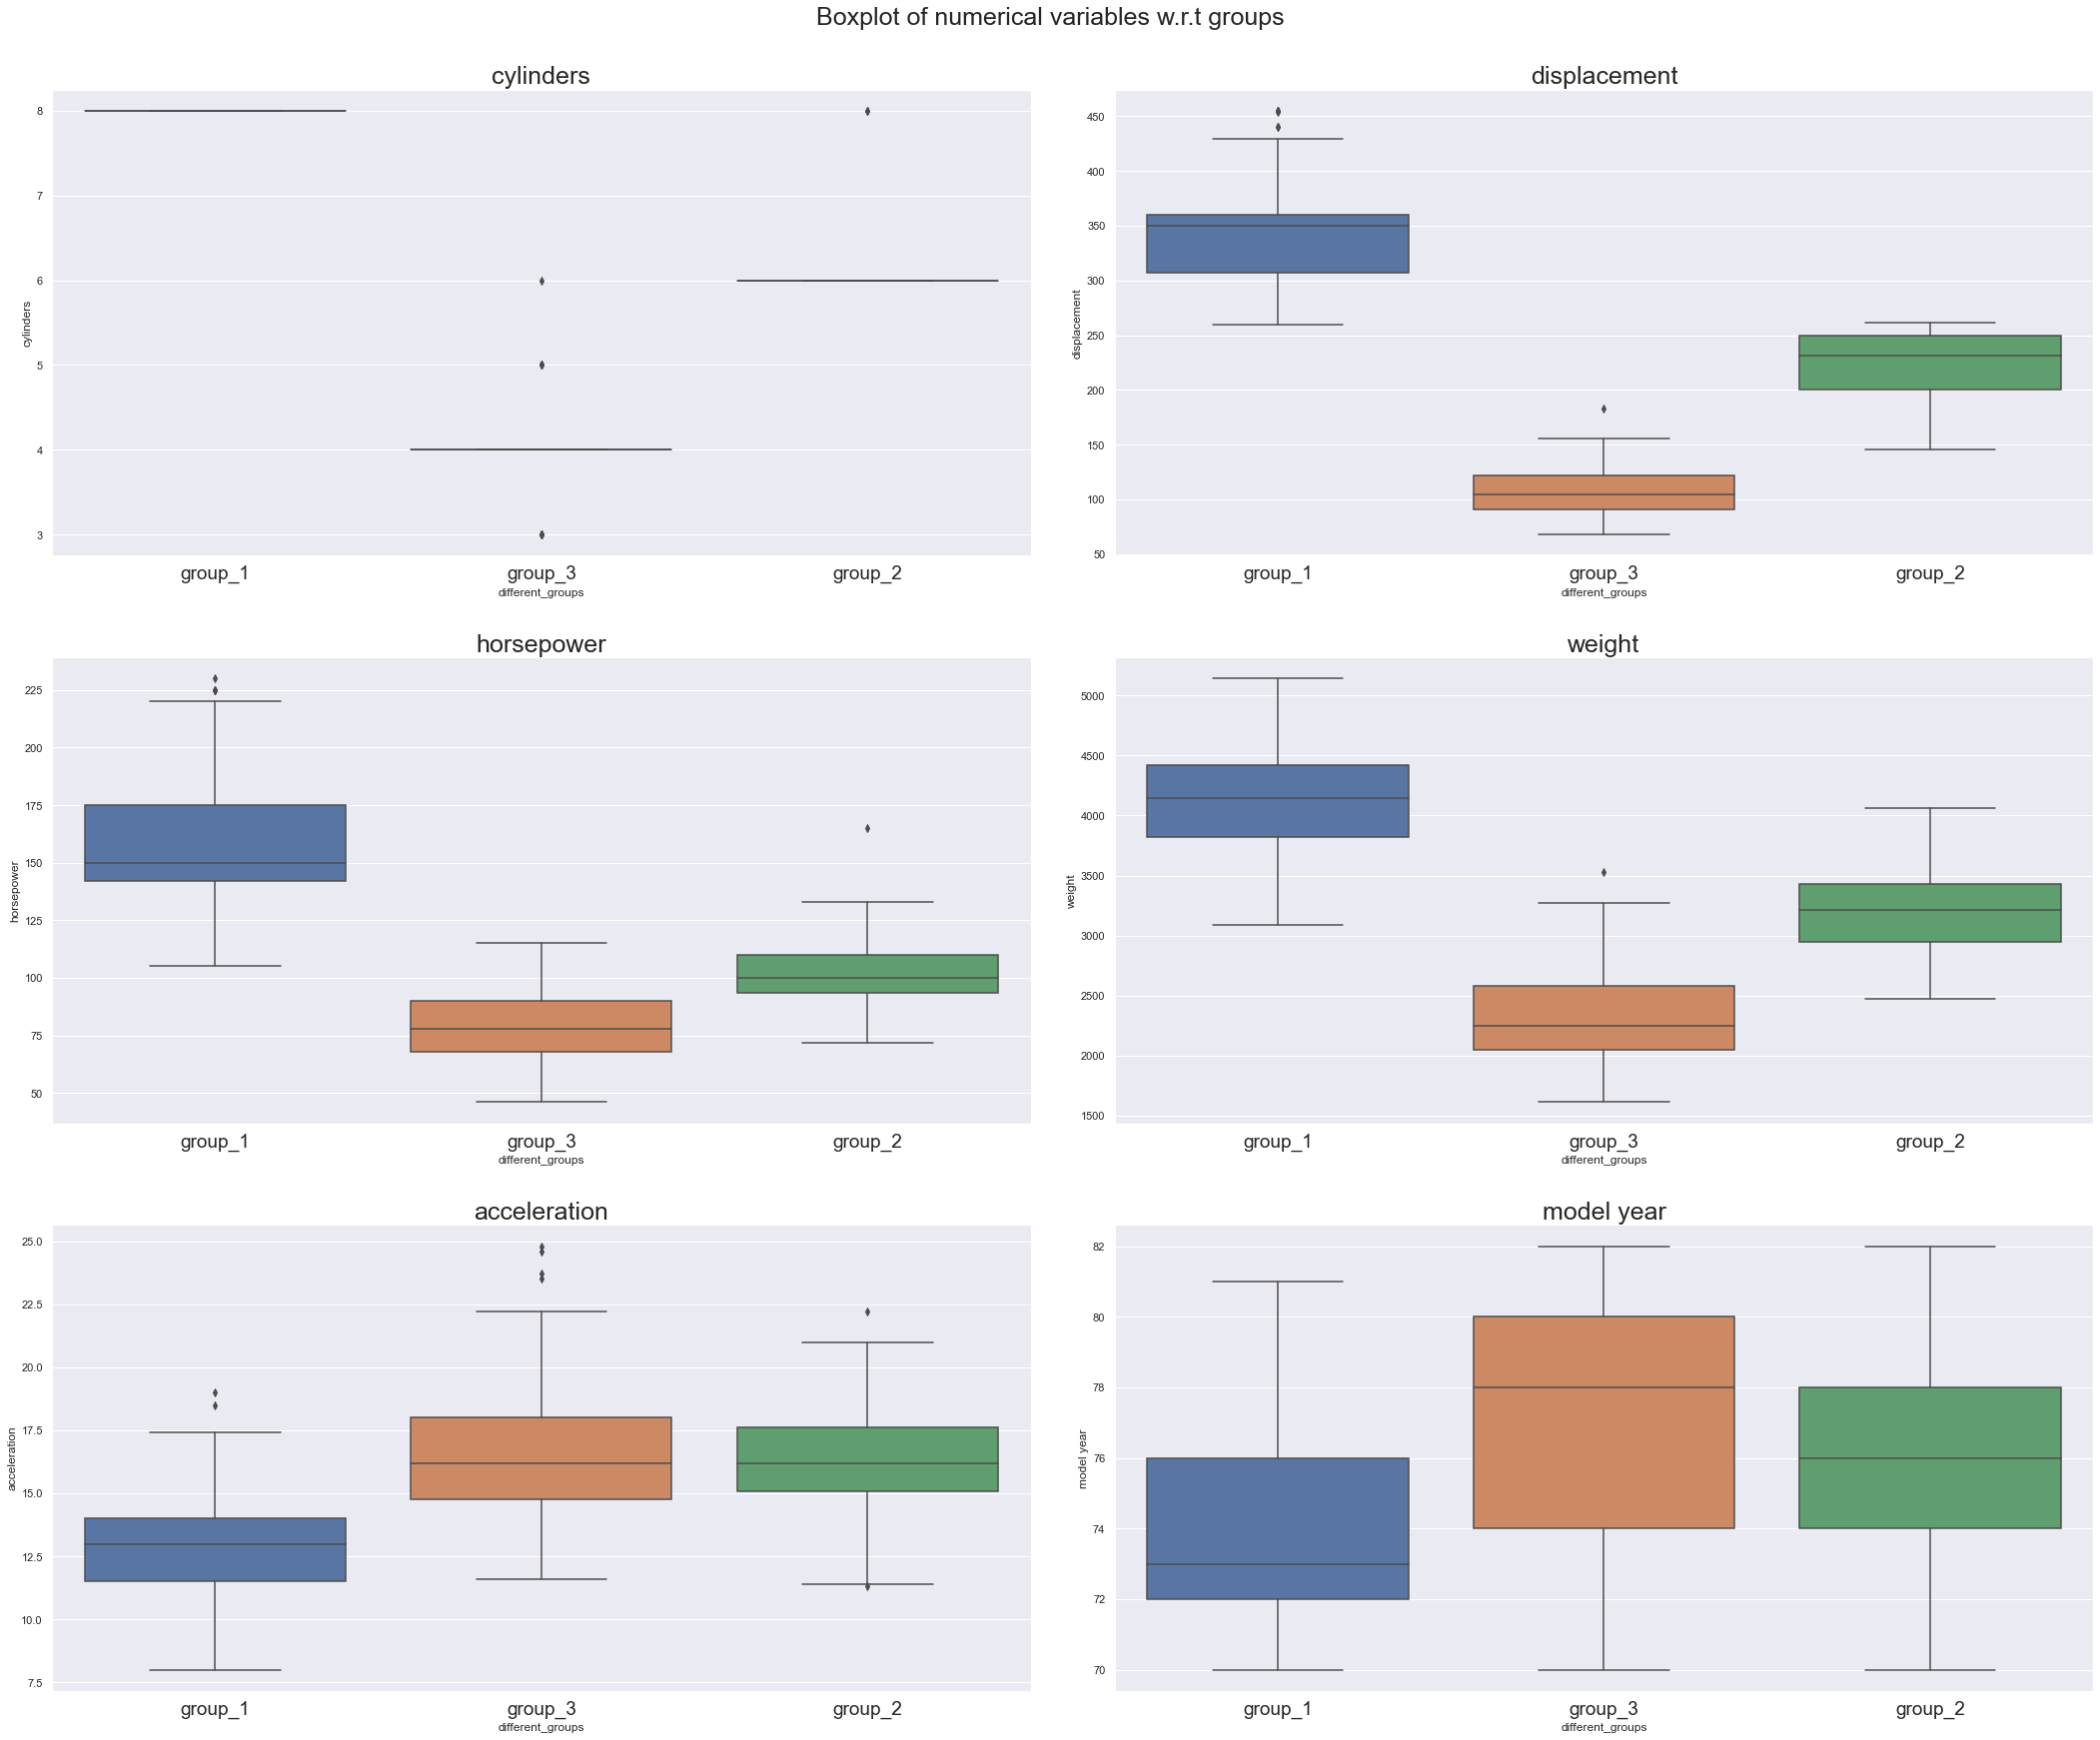

In [23]:
# Lets make boxplot of each numerical variables w.r.t 3 different groups

all_col = df.iloc[:,:-1].columns.tolist()
fig, axes = plt.subplots(3, 2,  figsize=(30, 25))
fig.suptitle('Boxplot of numerical variables w.r.t groups',fontsize = 25)
counter = 0
for ii in range(3):
    sns.boxplot(ax=axes[ii][0],y=df[all_col[counter]],x = df['different_groups'])
    axes[ii][0].set_title(all_col[counter],fontsize = 25)
    axes[ii][0].set_xticklabels( axes[ii][0].get_xmajorticklabels(),fontsize = 19)
    counter = counter+1
    sns.boxplot(ax=axes[ii][1],y=df[all_col[counter]],x = df['different_groups'])
    axes[ii][1].set_title(all_col[counter],fontsize = 25)
    axes[ii][1].set_xticklabels( axes[ii][1].get_xmajorticklabels(),fontsize = 19)
    counter = counter+1
    
fig.tight_layout(pad=3.0)

**Observations**

- **Group 1**:
   - It has high number of cylinders
   - Its engine displacement if very high
   - Its horse power is also high
   - Its weight is also high
   - Its acceleration is low which is obvious because cars are very heavy
   - Its model year is low indicating these cars are very old
   
- **Group 3**:
   - Its number of  cylinders are low
   - Its engine displacement is very low
   - Its horse power is also low
   - Its weight is also medium
   - Its acceleration is high
   - 50 % of the cars are made after years 1978 which is relatively new
   
- **Group 2**:
   - It has medium number of cylinders
   - Its engine displacement is medium
   - Its horse power is also medium
   - Its weight is also high
   - Its acceleration is medium to high
   - Its model year ranges from 1970 to 1982

### Lets us compare mpg (miles per gallon) vs different groups obtained from t-SNE

<AxesSubplot:xlabel='different_groups', ylabel='mpg'>

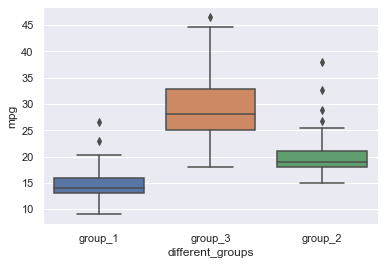

In [24]:
sns.boxplot(y=cData.mpg, x= df.different_groups)

**Observations**
- Group 1: mpg is low
- Group 2: mpg is medium
- Group 3: mpg is high

### Lets us make scatter plot of first and second component of PCA 

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

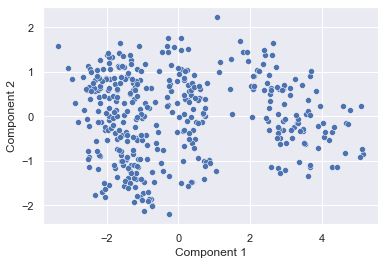

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced_pca = pca.fit_transform(X)

# storing results in a dataframe
reduced_data_df_pca = pd.DataFrame(data = X_reduced_pca, columns = ['Component 1', 'Component 2'])
sns.scatterplot(x=reduced_data_df_pca.iloc[:,0],y=reduced_data_df_pca.iloc[:,1])

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

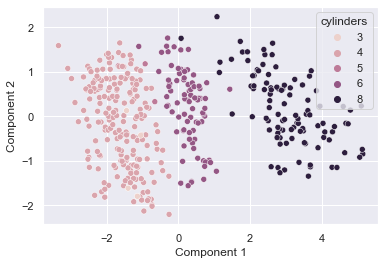

In [26]:
# Lets us plot scatter plot of first 2 component of PCA w.r.t number of number of cylinders
sns.scatterplot(x=reduced_data_df_pca.iloc[:,0],y=reduced_data_df_pca.iloc[:,1],hue=cData.cylinders)

**Observations**

- The groups of data points are not as separable as it is case of t-SNE dimensionality reduction


### Let try running t-SNE with different values of perplexity

Visualizing the lower dimensional representation of data for different values of perplexity


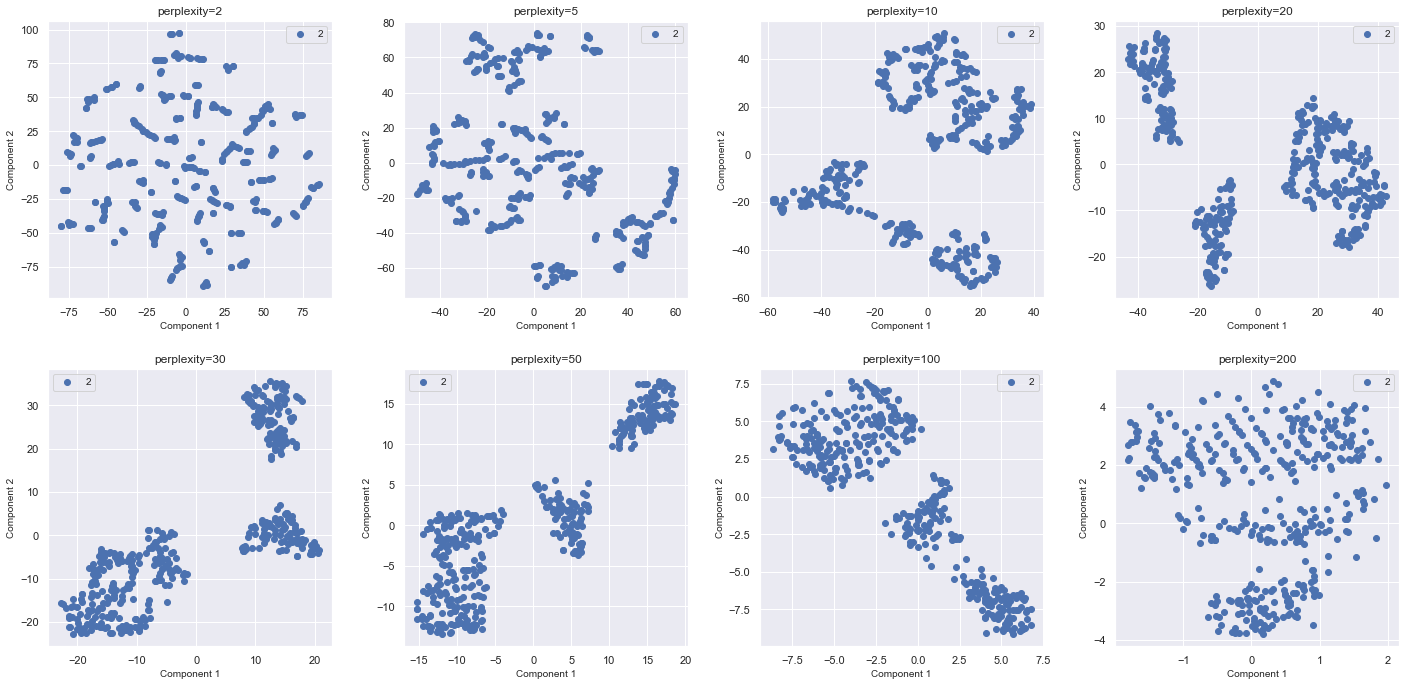

In [27]:
perplexity = [2,5,10,20,30,50,100,200]

plt.figure(figsize=(20,10))
print("Visualizing the lower dimensional representation of data for different values of perplexity")

for i in range(len(perplexity)):
    tsne = TSNE(n_components=2, perplexity=perplexity[i], n_jobs=-2, random_state=42)
    # n_jobs specifies the number of parallel jobs to run
    # -2 means using all processors except one
    X_red = tsne.fit_transform(X)
    
    red_data_df = pd.DataFrame(data = X_red, columns = ['Component 1', 'Component 2'])
    
    plt.subplot(2,int(len(perplexity)/2),i+1)
    
    plt.xlabel('Component 1',fontsize=10)
    plt.ylabel('Component 2',fontsize=10)
    plt.title("perplexity="+str(perplexity[i]))
    plt.scatter(red_data_df.loc[:, 'Component 1'], red_data_df.loc[:, 'Component 2'])#, 
    plt.legend(perplexity,prop={'size': 10})
    plt.tight_layout(pad=2)

### Observations

* With low perplexity value (2), data points are very scattered and sparse.
* With very high value of perplexity (100 and 200), the data points are spread through out the space and the groups formed are not clearly separable.
* With perplexity values ranging from 5 to 50, three distinct groups are clearly visible.

**In general, the range  of values recommended for perplexity is between 5 to 50.**

# Conclusion

**As we know that new techniques are required to effectively analyze ever larger data sets.**

**In this case study we can see a visual representation of our data using t-distributed Stichastic Neighbour Embedding (t-SNE).**

- The very high dimensional nature of many data sets makes direct visualization impossible as we humans can only comprehend three dimensions. The solution is to work with data dimension reduction techniques.
- When reducing the dimensions of data, it’s important not to lose more information than is necessary.
- t-distributed Stochastic Neighbour Embedding (t-SNE) is a non-linear dimensionality reduction technique that has the ability to preserve local structure in the data, which means that points which are close to one another in higher dimensions will tend to be close to one another in lower dimensions.
- The advantage of t-SNE is that if categories are well-separated by t-SNE, machine learning is likely to be able to find a mapping from a new data point to the right category it belongs to. We can also expect to achieve high accuracy if we use the right prediction algorithm on the data.
- We can also get an idea of the appropriate number of clusters the data can be divided into by visualizing the lower dimension representation of the data obtained using t-SNE.
- t-SNE however requires more computation time, and is generally more suitable for visualization purposes only.